# PROJECT DEVELOPMENT

### DATA CLEANING AND BASIC EVALUATION

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
from matplotlib import pylab

In [2]:
# Data import from csv
df = pd.read_csv(r'C:\Users\Carla\Downloads\US_Accidents_June20.csv')

# Data header check
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Dataset check
df.shape

(3513617, 49)

In [6]:
# Confirmation of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

.

Now that we have the data imported and have reviewed that we have all of our elements as expected since they were imported correcly we can proceed with cleaning the data before generating some visuals to understand the data better.


In [3]:
# We will drop some columns which we won't be using for our analysis
df = df.drop(['TMC','Source','Start_Lat','Start_Lng','End_Lat','End_Lng','Number','Timezone','Weather_Timestamp','Airport_Code'], axis=1)

In [8]:
# To start cleaning the data we need to know how many null values we have and where they are
missing_data = df.isnull()
missing_data.head(5)

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Now we generate a count list for every item to know how many we are missing from each attribute before deciding how to proceed
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    3513617
Name: ID, dtype: int64

Severity
False    3513617
Name: Severity, dtype: int64

Start_Time
False    3513617
Name: Start_Time, dtype: int64

End_Time
False    3513617
Name: End_Time, dtype: int64

Distance(mi)
False    3513617
Name: Distance(mi), dtype: int64

Description
False    3513616
True           1
Name: Description, dtype: int64

Street
False    3513617
Name: Street, dtype: int64

Side
False    3513617
Name: Side, dtype: int64

City
False    3513505
True         112
Name: City, dtype: int64

County
False    3513617
Name: County, dtype: int64

State
False    3513617
Name: State, dtype: int64

Zipcode
False    3512548
True        1069
Name: Zipcode, dtype: int64

Country
False    3513617
Name: Country, dtype: int64

Temperature(F)
False    3447885
True       65732
Name: Temperature(F), dtype: int64

Wind_Chill(F)
True     1868249
False    1645368
Name: Wind_Chill(F), dtype: int64

Humidity(%)
False    3443930
True       69687
Name: Humidity(%), dtype: int64

Pr

We can see that we are missing information from

Description- Missing  1

City- Missing 112

Zipcode- Missing 1069

Temperature(F)- Missing 65732

Wind_Chill(F)- Missing  1868249

Humidity(%)- Missing 69687

Pressure(in)- Missing  55882

Visibility(mi)- Missing 75856

Wind_Direction- Missing 58874

Wind_Speed(mph)- Missing  454609

Precipitation(in)- Missing 2025874

Weather_Condition- Missing 76138

Sunrise_Sunset- Missing 115

Civil_Twilight- Missing 115

Nautical_Twilight- Missing 115

Astronomical_Twilight- Missing   115

From these items we can see how Wind_Chill(F) and Precipitation(in) are missing a large number of values which we cannot estimate. Therefore these weather condition won't be able to provdide us with the information needed to see any patterns. 
The rest of the items are missing a smaller subset of information so we can drop missing values without affecting our data since the % affected is very small.

In [4]:
#Dropping features with missing high volume of values
df = df.drop(['Wind_Chill(F)','Precipitation(in)'], axis=1)

In [5]:
df = df.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

Another observation is that we have 4 columns that state day or night of accident ocurrence with difference of by which parameter day and night are classified. For the objectives of this project we will use the Sunrise_Sunset since is a common term easily understood by the population.

In [6]:
df = df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [13]:
#We run descriptives to understand the data better
df.describe(include=['object'])

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Wind_Direction,Weather_Condition,Sunrise_Sunset
count,3027865,3027865,3027865,3027864,3027865,3027865,3027865,3027865,3027865,3027865,3027865,3027865,3027865,3027865
unique,3027865,2766798,2811241,1565376,163238,3,11473,1702,49,376627,1,23,124,2
top,A-179915,2017-05-15 09:22:55,2017-05-15 15:22:55,At I-15 - Accident.,I-5 N,R,Houston,Los Angeles,CA,91761,US,CALM,Clear,Day
freq,1,74,73,1829,34653,2479817,87962,208725,674669,4793,3027865,214756,614960,2286540


In [14]:
df.describe()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,3.027865e+06,3.027865e+06,3.027865e+06,3.027865e+06,3.027865e+06,3.027865e+06,3.027865e+06
mean,2.332572e+00,2.790650e-01,6.242473e+01,6.414011e+01,2.970479e+01,9.159384e+00,8.220330e+00
std,5.504362e-01,1.533018e+00,1.869422e+01,2.263459e+01,8.655740e-01,2.814181e+00,5.245723e+00
min,1.000000e+00,0.000000e+00,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,5.000000e+01,4.800000e+01,2.968000e+01,1.000000e+01,5.000000e+00
50%,2.000000e+00,0.000000e+00,6.400000e+01,6.600000e+01,2.993000e+01,1.000000e+01,7.000000e+00
75%,3.000000e+00,1.000000e-02,7.650000e+01,8.300000e+01,3.008000e+01,1.000000e+01,1.150000e+01
max,4.000000e+00,2.544000e+02,1.706000e+02,1.000000e+02,5.774000e+01,1.110000e+02,9.840000e+02


In [15]:
#Correlation of our data
df.corr()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.152256,-0.028086,0.034294,0.037309,-0.006813,0.035098,-0.043950,-0.004241,-0.139742,-0.008661,0.059483,-0.006424,-0.025122,-0.003799,-0.047960,-0.052842,-0.005630,-0.191031,NaN
Distance(mi),0.152256,1.000000,-0.037138,0.018527,-0.028581,-0.011193,0.014581,-0.016698,0.000377,-0.045414,-0.002780,0.032273,-0.003203,-0.012060,-0.001144,-0.022121,-0.011485,-0.000932,-0.070608,NaN
Temperature(F),-0.028086,-0.037138,1.000000,-0.338634,-0.002526,0.192198,-0.005904,-0.003175,0.000445,0.039378,0.000141,-0.006776,0.004377,0.005557,-0.000623,0.003389,0.001224,-0.000567,0.062292,NaN
Humidity(%),0.034294,0.018527,-0.338634,1.000000,0.102126,-0.387426,-0.146015,-0.003475,-0.002431,-0.050972,0.002045,-0.003462,-0.009275,-0.002306,0.001657,-0.001087,-0.013043,-0.000673,-0.033346,NaN
Pressure(in),0.037309,-0.028581,-0.002526,0.102126,1.000000,-0.010034,0.000752,0.011930,-0.005709,-0.034189,0.000656,0.032771,-0.010658,0.011406,0.001632,0.021376,-0.009156,-0.000747,-0.010967,NaN
Visibility(mi),-0.006813,-0.011193,0.192198,-0.387426,-0.010034,1.000000,0.015471,0.006763,0.005181,0.034022,0.003880,-0.001219,0.011743,0.003444,0.000169,0.006959,0.005712,0.004070,0.029633,NaN
Wind_Speed(mph),0.035098,0.014581,-0.005904,-0.146015,0.000752,0.015471,1.000000,-0.002527,0.000200,0.009743,0.000179,0.007449,0.000826,-0.004428,-0.001357,-0.000615,0.003557,-0.002188,0.017627,NaN
Amenity,-0.043950,-0.016698,-0.003175,-0.003475,0.011930,0.006763,-0.002527,1.000000,0.003130,0.117359,0.005476,-0.027463,0.021456,0.050202,0.000041,0.185727,0.033046,0.007947,0.103200,NaN
Bump,-0.004241,0.000377,0.000445,-0.002431,-0.005709,0.005181,0.000200,0.003130,1.000000,0.009325,-0.000683,0.000851,0.030307,-0.000440,-0.000096,0.003123,0.013249,0.668767,-0.004346,NaN
Crossing,-0.139742,-0.045414,0.039378,-0.050972,-0.034189,0.034022,0.009743,0.117359,0.009325,1.000000,0.066562,-0.079780,0.054103,0.230086,-0.001131,0.122257,0.070495,0.020465,0.451165,NaN


Another way t better visualize the correlations is to plot a heat map

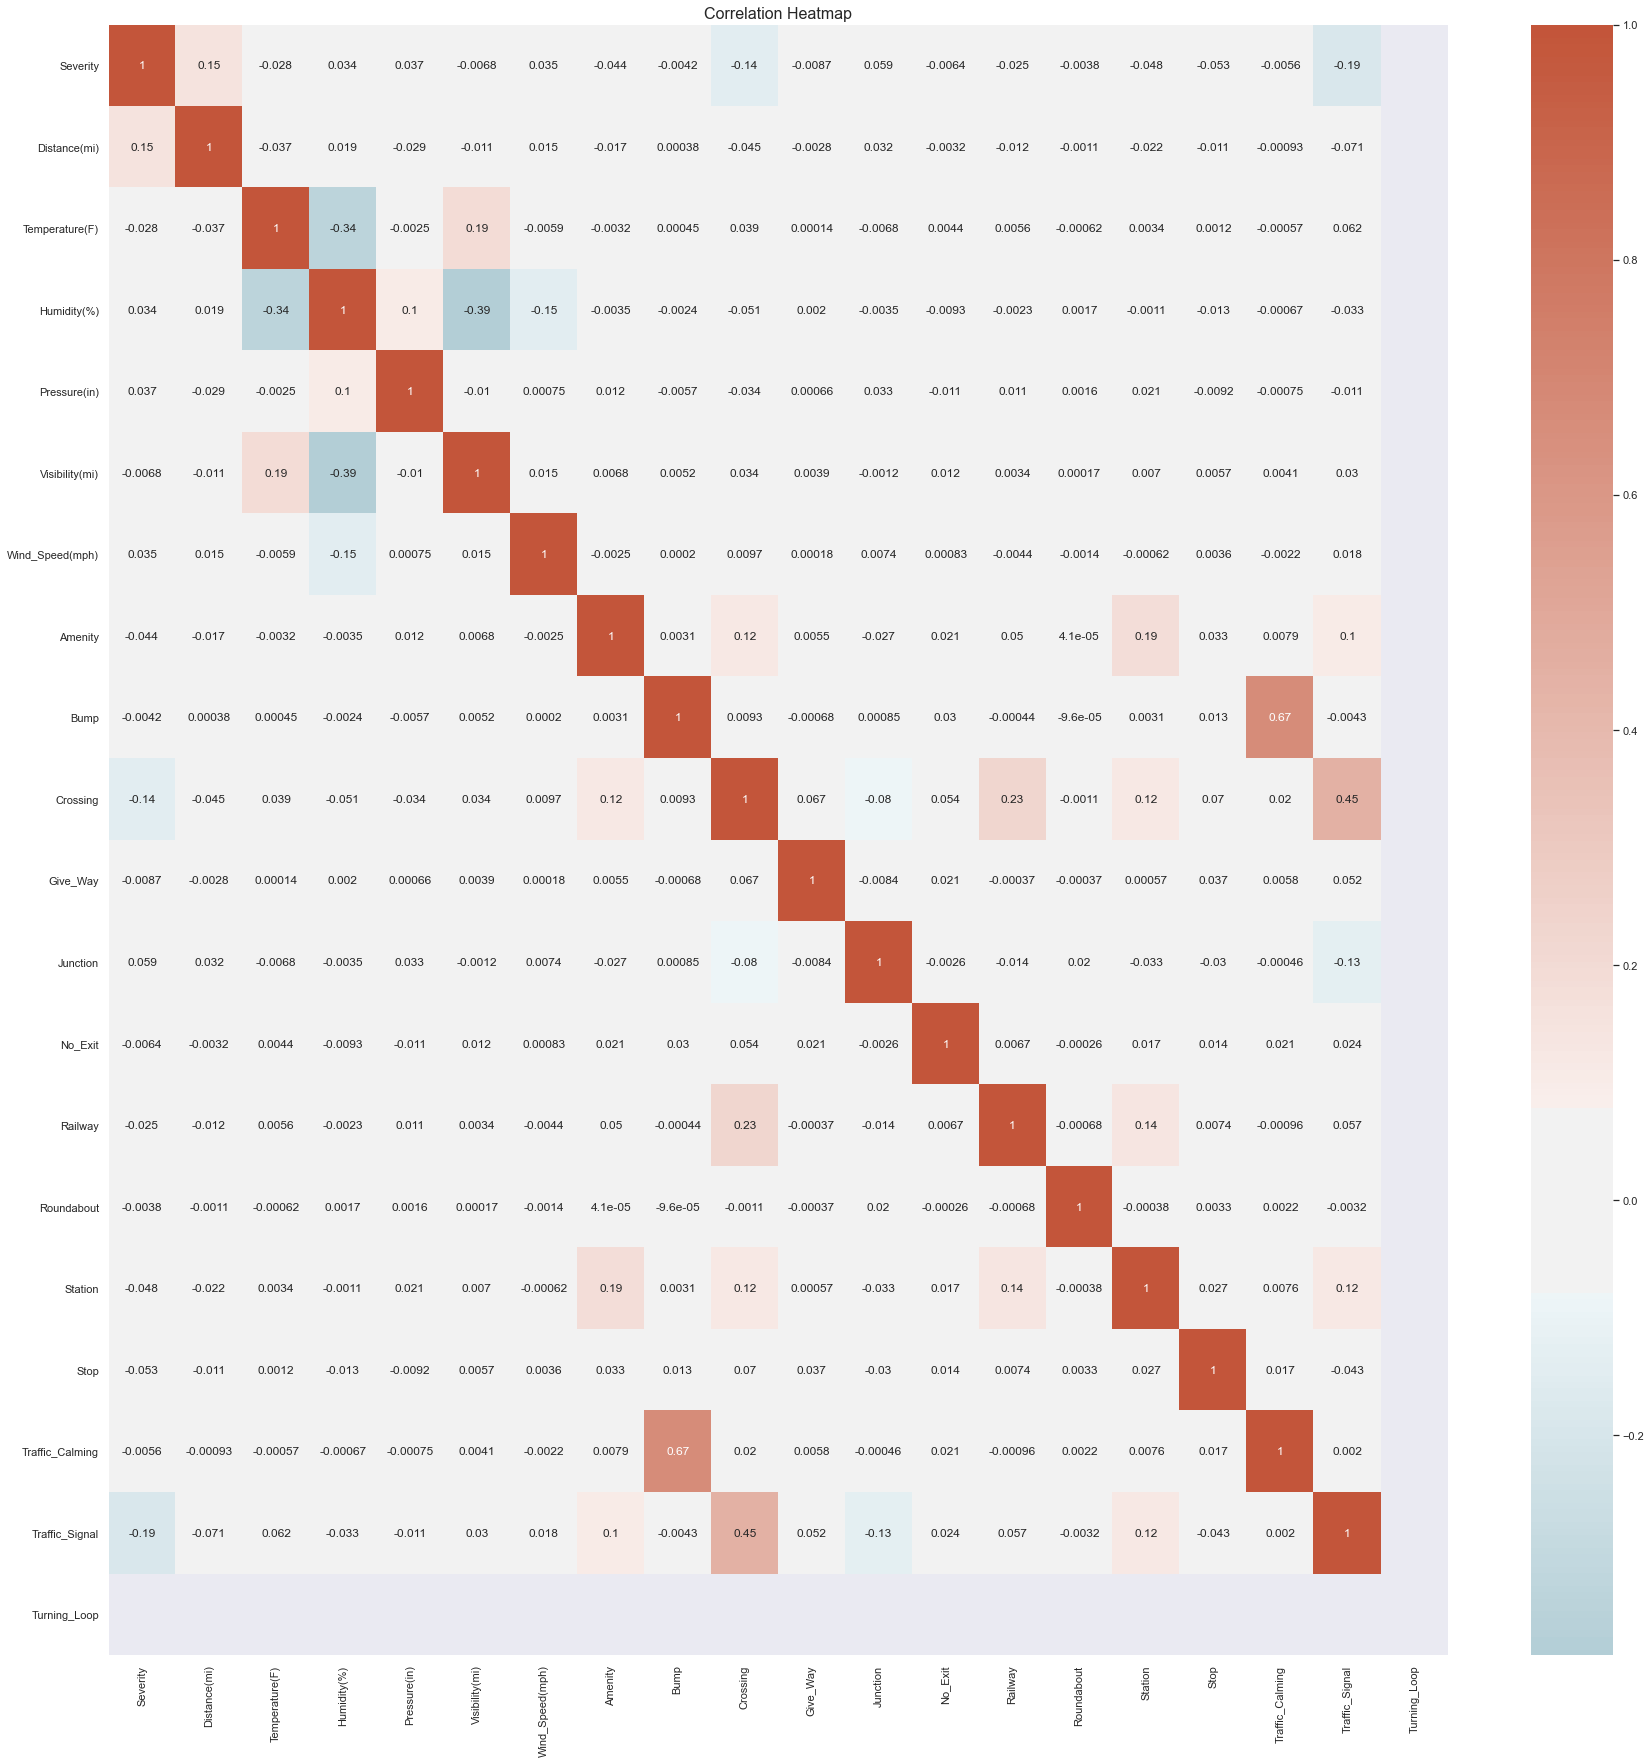

In [8]:
df['Severity'] = df['Severity'].astype(int)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
sns.set(rc={'figure.figsize':(40,15)})

We can observe that most of the attributes do nto have a strong correlation with severity

So is best to plot different measures to corroborate such findings

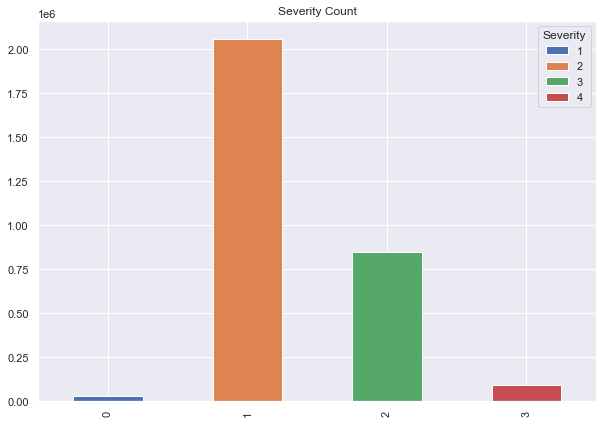

In [11]:
# Severity prevalance
dfsev = df.groupby(['Severity']).size().reset_index().pivot(\
    columns='Severity', values=0)
dfsev.plot(kind='bar', stacked=True, title='Severity Count')
sns.set(rc={'figure.figsize':(7,4)})

## Severity and Weather

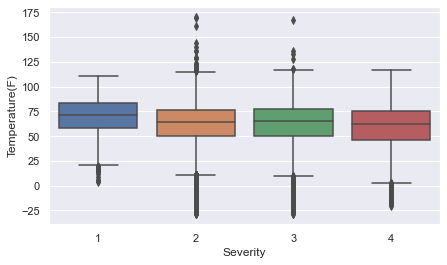

In [12]:
#We see the relation between severity and temperature to evaluate behaviour
sns.boxplot(x="Severity", y="Temperature(F)", data=df)

In [19]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Temperature(F)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.02808606434133205  with a P-value of P = 0.0


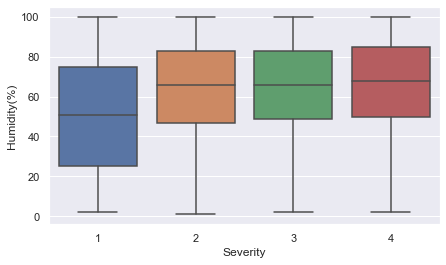

In [13]:
#We see the relation between severity and humitity to evaluate behaviour
sns.boxplot(x="Severity", y="Humidity(%)", data=df)

In [21]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Humidity(%)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.03429434357932345  with a P-value of P = 0.0


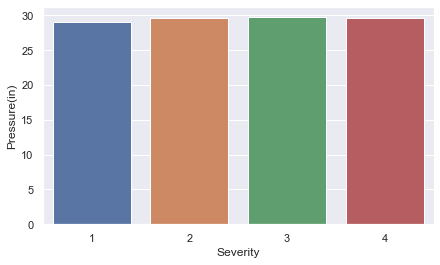

In [14]:
#We see the relation between severity and pressure to evaluate behaviour
sns.barplot(x="Severity", y="Pressure(in)", data=df)

In [23]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Pressure(in)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.03730879036887993  with a P-value of P = 0.0


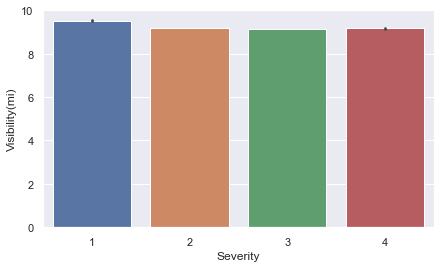

In [15]:
#We see the relation between severity and visibility to evaluate behaviour
sns.barplot(x="Severity", y="Visibility(mi)", data=df)

In [25]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Visibility(mi)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.00681318395441732  with a P-value of P = 2.0129751851426943e-32


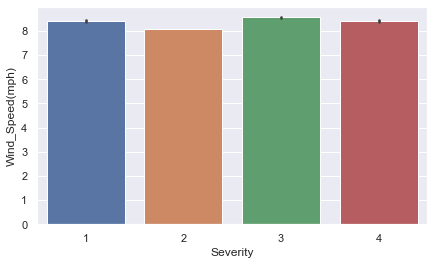

In [16]:
#We see the relation between severity and wind to evaluate behaviour
sns.barplot(x="Severity", y="Wind_Speed(mph)", data=df)

In [27]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Wind_Speed(mph)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.03509791768140011  with a P-value of P = 0.0


Is interesting to see that the graph don't seem to show a large variation among the values of the factors and their influence over the severity of the accident. Also, we can see the correlation is extremely weak or non existent.

In [28]:
# The wind direction contains multiple variables that refer to same items as can be seen here
df['Wind_Direction'].unique()

array(['SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE', 'South',
       'Variable', 'North', 'SE', 'SSE', 'ESE', 'East', 'NE', 'ENE', 'E',
       'W', 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [12]:
# Therefore we want to unify the values to a more concentrated set
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
df['Wind_Direction'].unique()

array(['SW', 'S', 'W', 'NW', 'N', 'VAR', 'SE', 'E', 'NE', 'CALM'],
      dtype=object)

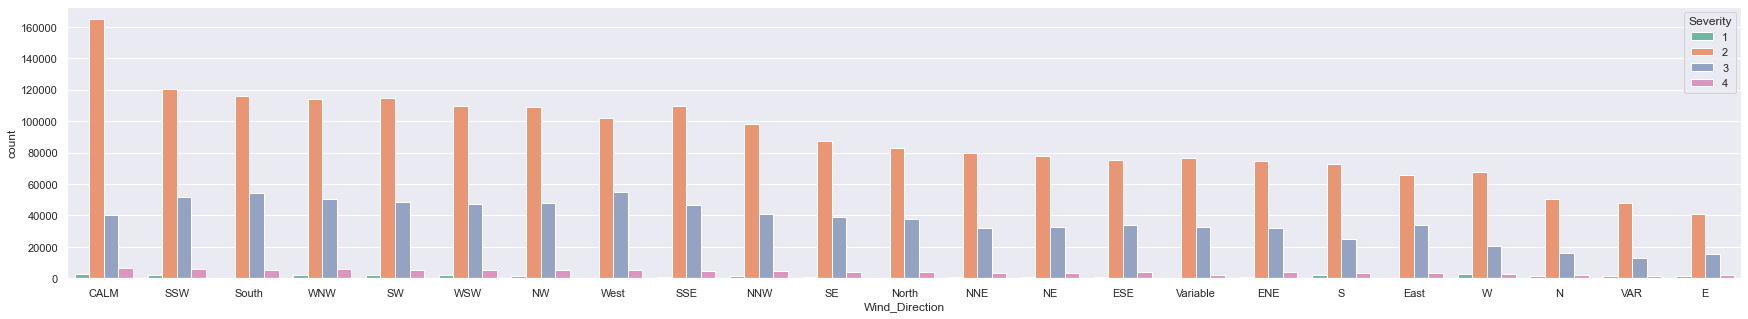

In [19]:
sns.countplot(x='Wind_Direction', hue='Severity', 
                      data=df ,palette="Set2", order=df['Wind_Direction'].value_counts().index)
sns.set(rc={'figure.figsize':(40,5)})

Wind conditions might also affect the prevalence of accidents

Besides the wind we can also take a look at the general weather condition since this will include several parameters. 

In [31]:
#This shows the top 20 conditions
dfwc = df['Weather_Condition'].value_counts()
dfwc=dfwc.head(20)
dfwc

Clear                           614960
Fair                            538444
Mostly Cloudy                   447119
Overcast                        321547
Partly Cloudy                   314809
Cloudy                          210325
Scattered Clouds                176041
Light Rain                      163977
Light Snow                       47118
Rain                             38524
Haze                             29740
Fog                              24985
Heavy Rain                       14390
Light Drizzle                    11267
Fair / Windy                      7882
Snow                              5246
Light Thunderstorms and Rain      4475
Mostly Cloudy / Windy             4425
Cloudy / Windy                    4304
Thunderstorm                      4051
Name: Weather_Condition, dtype: int64

In [32]:
#This shows the conditions and severity
sampledf = df.groupby(['Weather_Condition','Severity']).size()

print(sampledf)


Weather_Condition     Severity
Blowing Dust          1             1
                      2            61
                      3            11
Blowing Dust / Windy  1             8
                      2            95
                                 ... 
Wintry Mix            3           379
                      4            52
Wintry Mix / Windy    2            20
                      3            17
                      4             3
Length: 358, dtype: int64


The highlight of this table is that the highest amount of accidents happen with clear weather or very mild conditions

## Severity and Roads

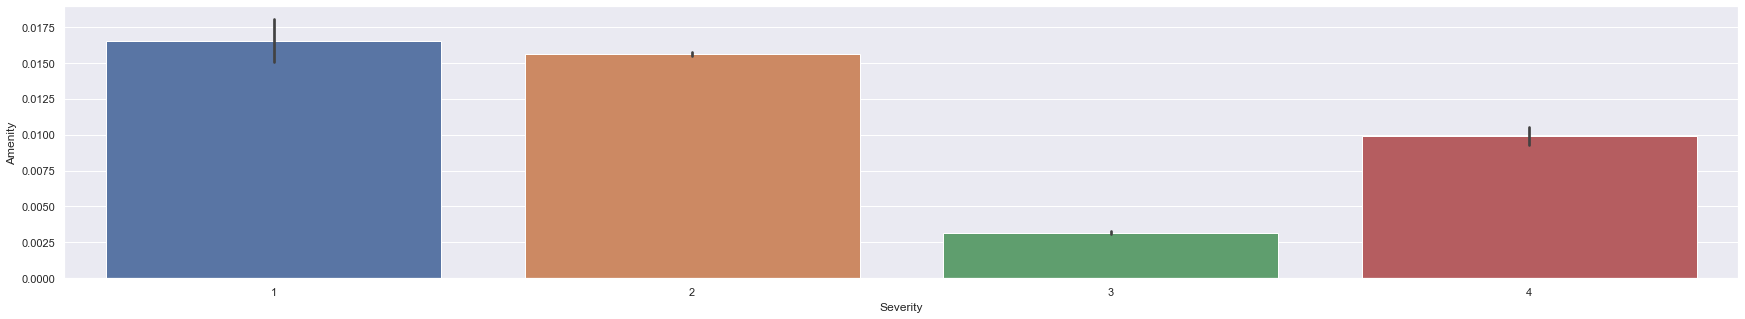

In [33]:
#We see the relation between severity and Amenity to evaluate behaviour
sns.barplot(x="Severity", y="Amenity", data=df)

In [34]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Amenity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.04394995423441109  with a P-value of P = 0.0


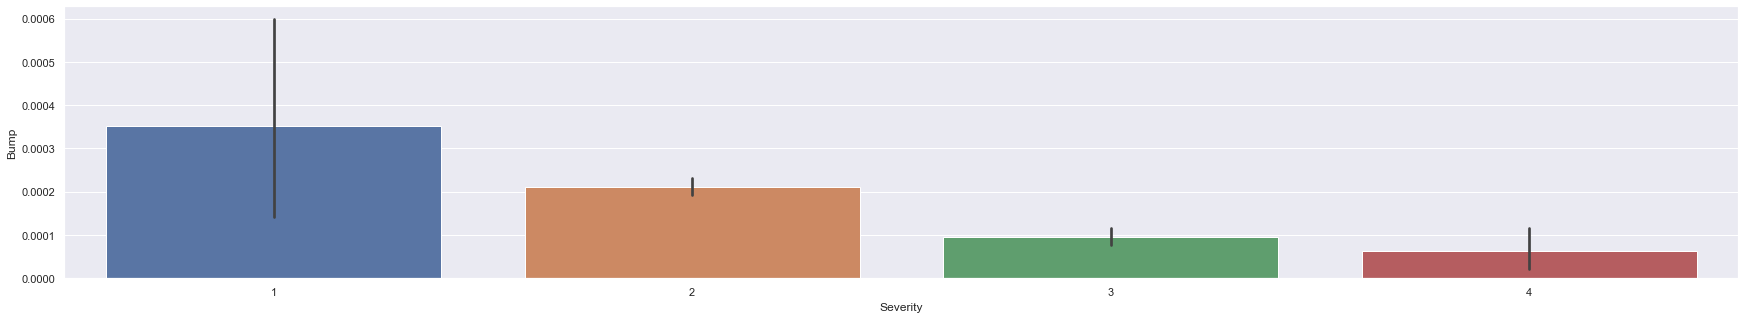

In [35]:
#We see the relation between severity and Bump to evaluate behaviour
sns.barplot(x="Severity", y="Bump", data=df)

In [36]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Bump'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.004241024367602383  with a P-value of P = 1.5860432637595376e-13


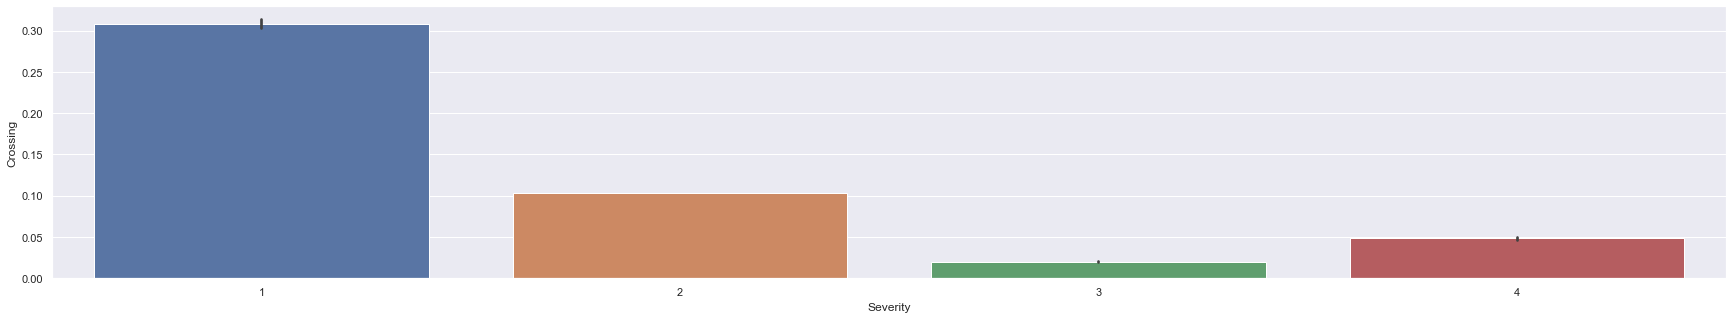

In [37]:
#We see the relation between severity and Crossing to evaluate behaviour
sns.barplot(x="Severity", y="Crossing", data=df)

In [38]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Crossing'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.13974184603595907  with a P-value of P = 0.0


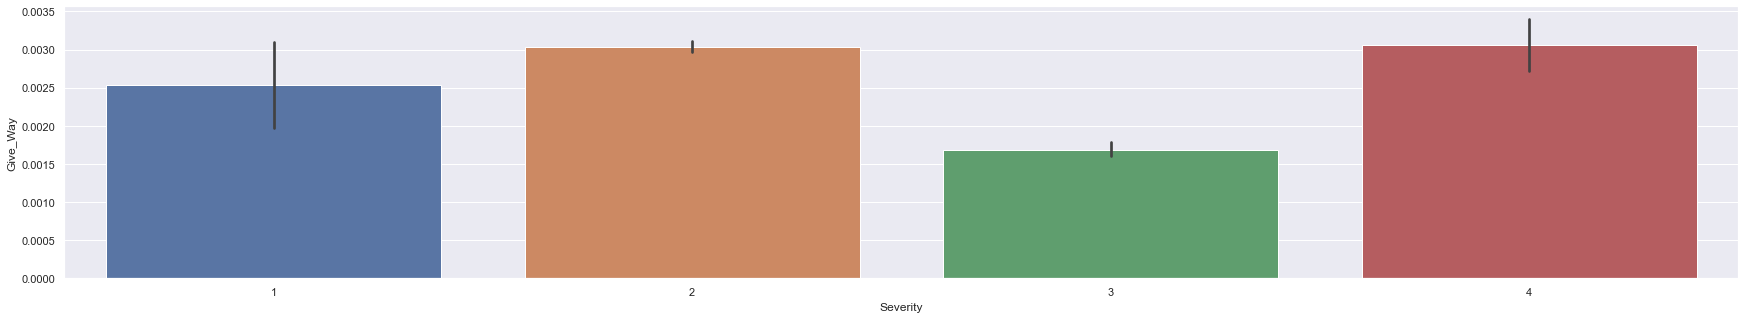

In [39]:
#We see the relation between severity and Give_Way to evaluate behaviour
sns.barplot(x="Severity", y="Give_Way", data=df)

In [40]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Give_Way'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.008661446459471967  with a P-value of P = 2.480575404493816e-51


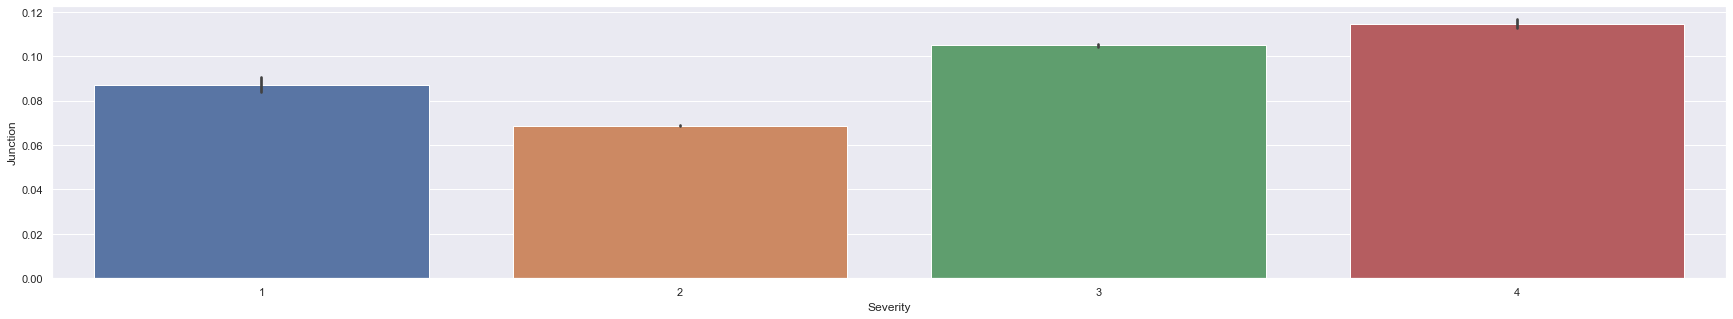

In [41]:
#We see the relation between severity and Junction to evaluate behaviour
sns.barplot(x="Severity", y="Junction", data=df)

In [42]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Junction'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.059482970619845976  with a P-value of P = 0.0


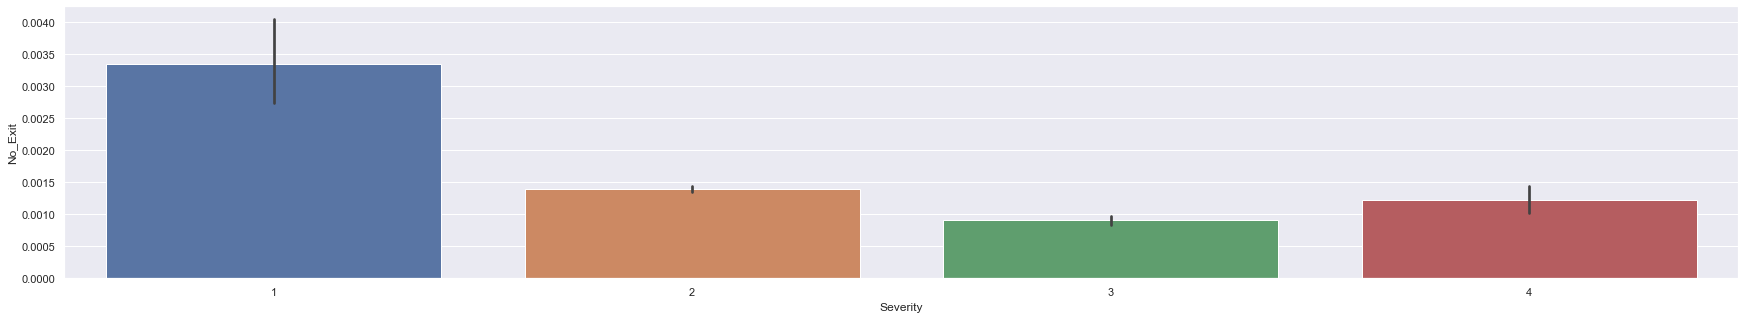

In [43]:
#We see the relation between severity and No_Exit to evaluate behaviour
sns.barplot(x="Severity", y="No_Exit", data=df)

In [44]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['No_Exit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.006423962944007156  with a P-value of P = 5.208070758755509e-29


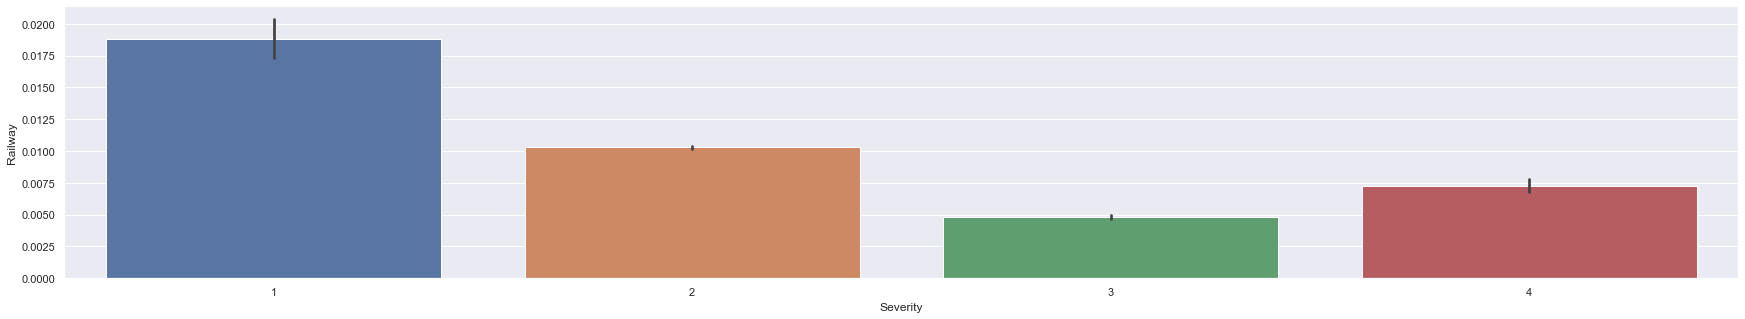

In [45]:
#We see the relation between severity and Railway to evaluate behaviour
sns.barplot(x="Severity", y="Railway", data=df)

In [46]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Railway'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.025121511164932483  with a P-value of P = 0.0


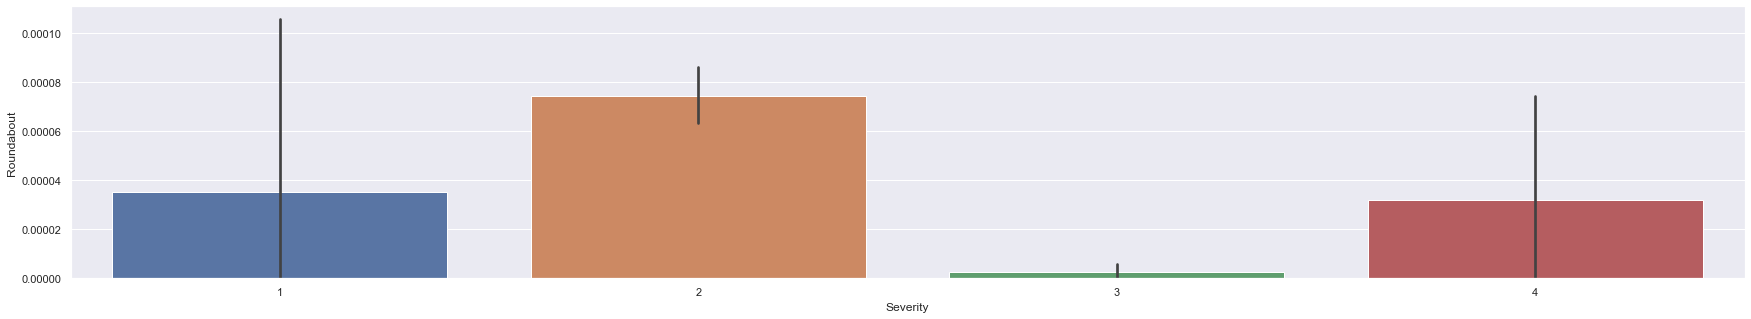

In [47]:
#We see the relation between severity and Roundabout to evaluate behaviour
sns.barplot(x="Severity", y="Roundabout", data=df)

In [48]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Roundabout'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.0037988359979566214  with a P-value of P = 3.8358075743441e-11


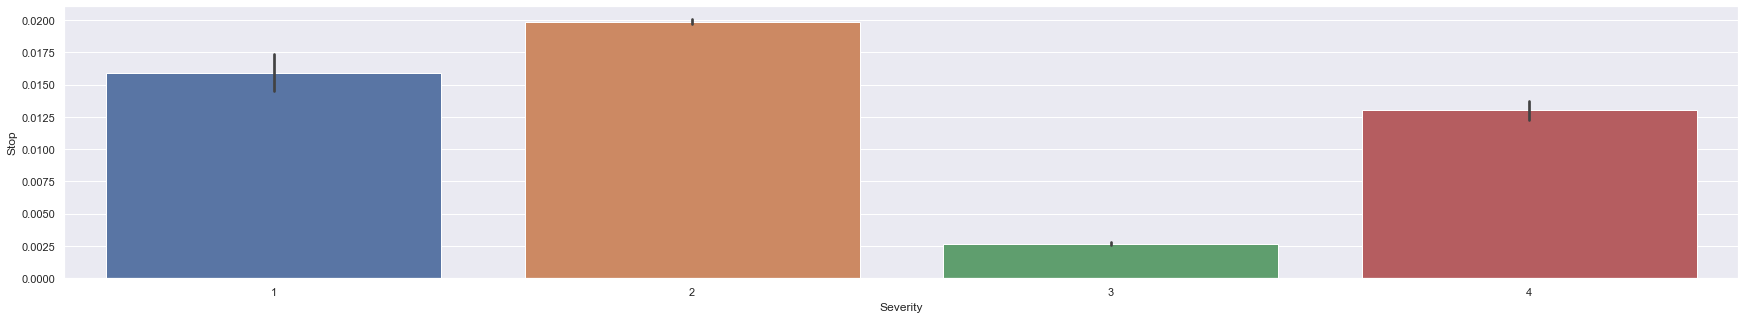

In [49]:
#We see the relation between severity and Stop to evaluate behaviour
sns.barplot(x="Severity", y="Stop", data=df)

In [50]:
pearson_coef, p_value = stats.pearsonr(df['Severity'], df['Stop'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.052841585272271334  with a P-value of P = 0.0


When looking at the road attributes and how these could be related to the severity of the accidents, is interesting to notice that many of these attributes might influence mostly the low severity type of accidents, which happen to be the less frequest type of accidents as well.
Unfortunately we don't find a significant correlation among them.

## Severity and Day time

Another thing to consider is time of the day. For that we use the sunset and sunrise paramether but in this case we need to convert the object into values to be able to evaluate.

In [13]:
# Evaluation of accidents by day-night status
day_night= pd.get_dummies(df["Sunrise_Sunset"])
df= pd.concat([df, day_night], axis=1)
df.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,County,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Day,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,...,False,False,False,False,False,True,False,Night,0,1
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,...,False,False,False,False,False,False,False,Night,0,1
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,False,False,False,False,False,True,False,Day,1,0
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,Franklin,...,False,False,False,False,False,False,False,Day,1,0
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,Montgomery,...,False,False,False,False,False,False,False,Day,1,0


In [52]:
#We can count how many accidents happen during day or night time
daynight_counts = df['Day'].value_counts().to_frame()

print(daynight_counts)


       Day
1  2286540
0   741325


We can observe that there are more accidents happening during the day time but this doesnt tell us how this attribute affect the severity. For this we plot our data

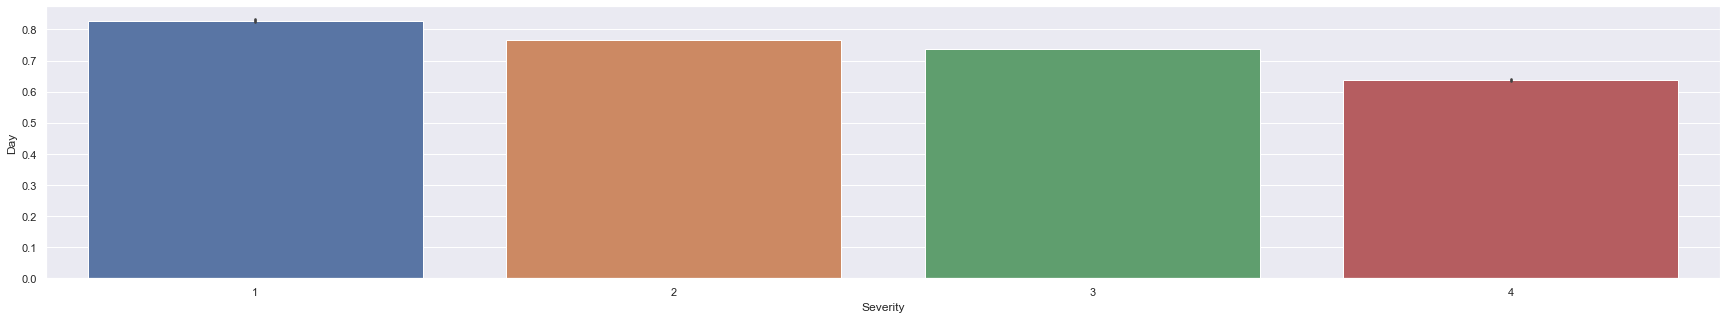

In [53]:
sns.barplot(x="Severity", y="Day", data=df)

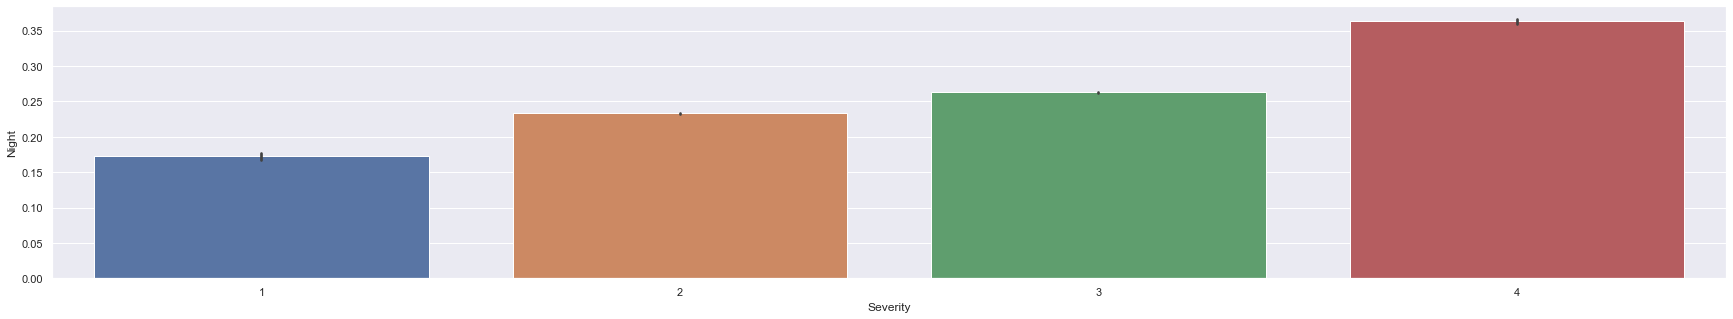

In [54]:
sns.barplot(x="Severity", y="Night", data=df)

It seems that the lower severity of accidents happen during day time while the higher severity accidents happen during night time.

## Severity and States

Another thing to evaluate is the prevalence by state

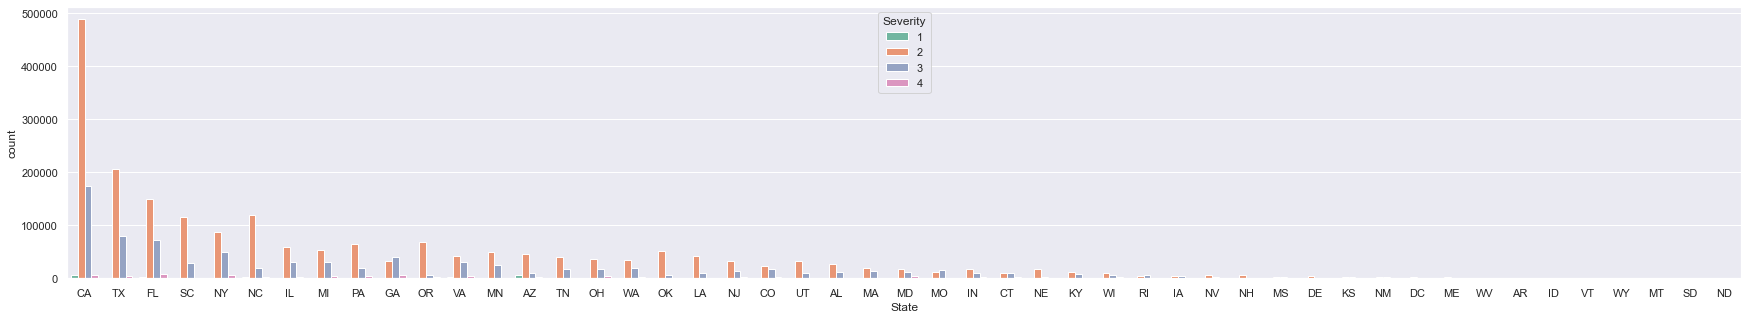

In [55]:
# We evaluate severity of accidents by state
sns.countplot(x='State', hue='Severity', 
                      data=df ,palette="Set2", order=df['State'].value_counts().index)
sns.set(rc={'figure.figsize':(30,5)})


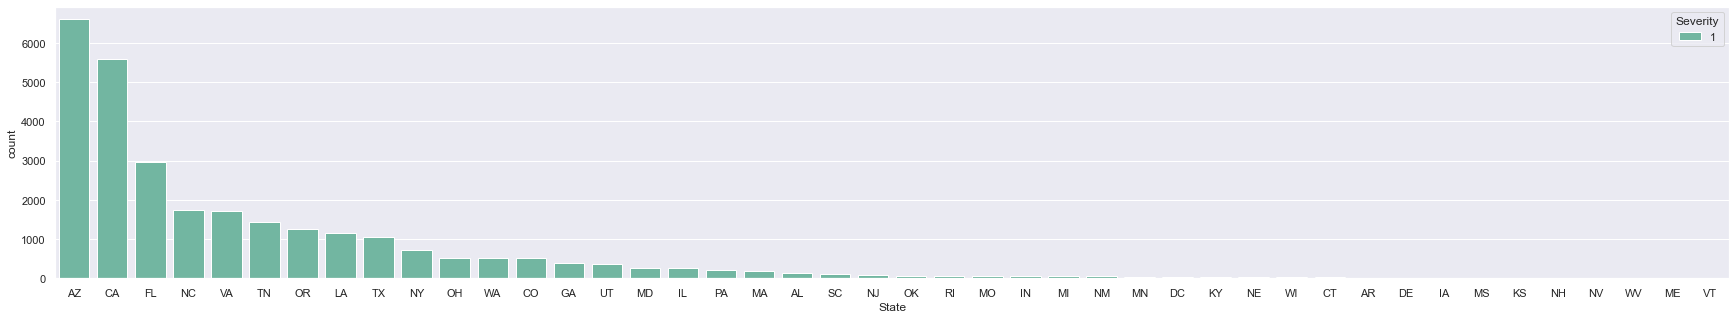

In [56]:
#To be able to observe properly we can subset our df by severity
severity1= df[(df['Severity']==1)]

sns.countplot(x='State', hue='Severity', 
                      data=severity1 ,palette="Set2", order=severity1['State'].value_counts().index)
sns.set(rc={'figure.figsize':(30,5)})

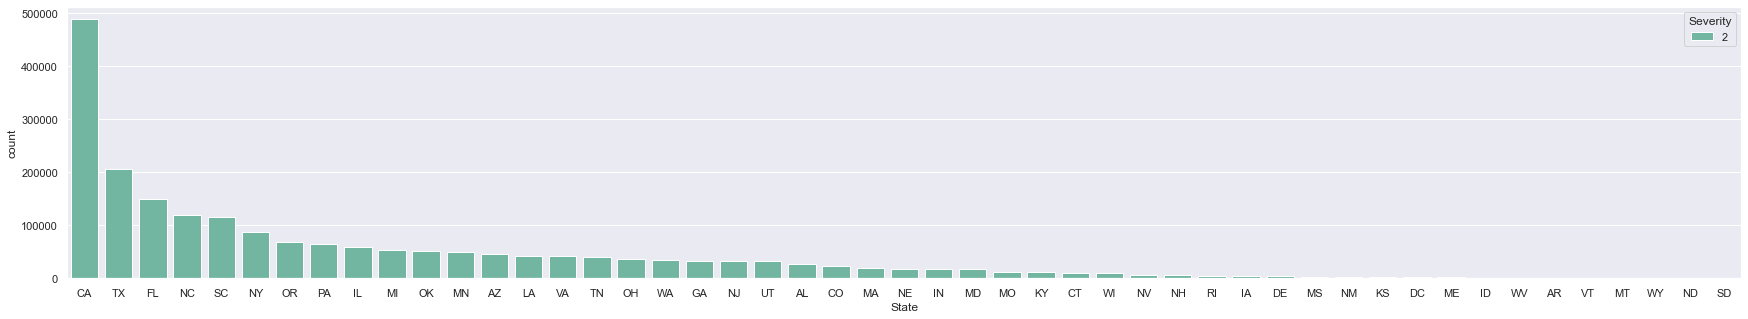

In [57]:
#To be able to observe properly we can subset our df by severity
severity2= df[(df['Severity']==2)]

sns.countplot(x='State', hue='Severity', 
                      data=severity2 ,palette="Set2", order=severity2['State'].value_counts().index)
sns.set(rc={'figure.figsize':(30,5)})

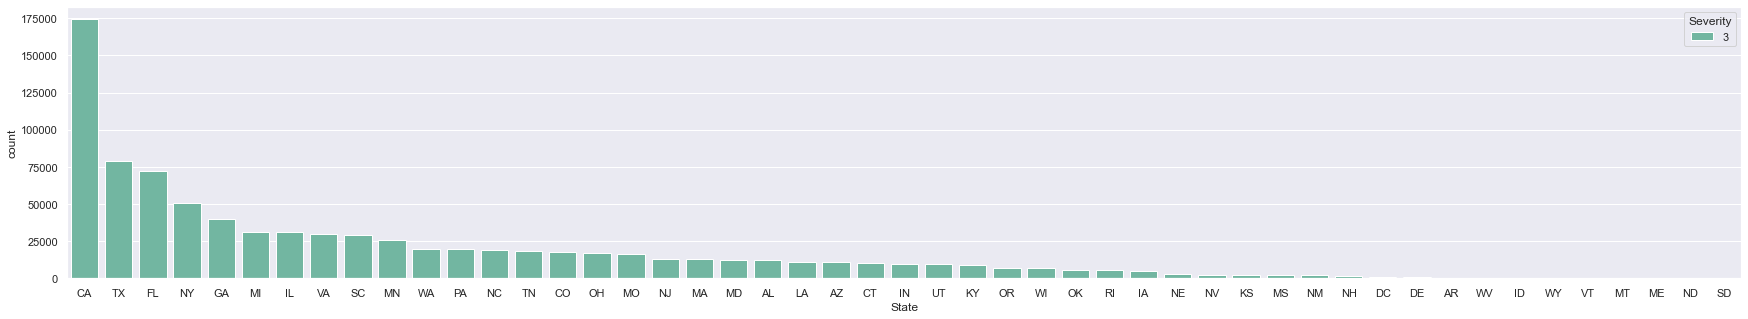

In [58]:
#To be able to observe properly we can subset our df by severity
severity3= df[(df['Severity']==3)]

sns.countplot(x='State', hue='Severity', 
                      data=severity3 ,palette="Set2", order=severity3['State'].value_counts().index)
sns.set(rc={'figure.figsize':(30,5)})

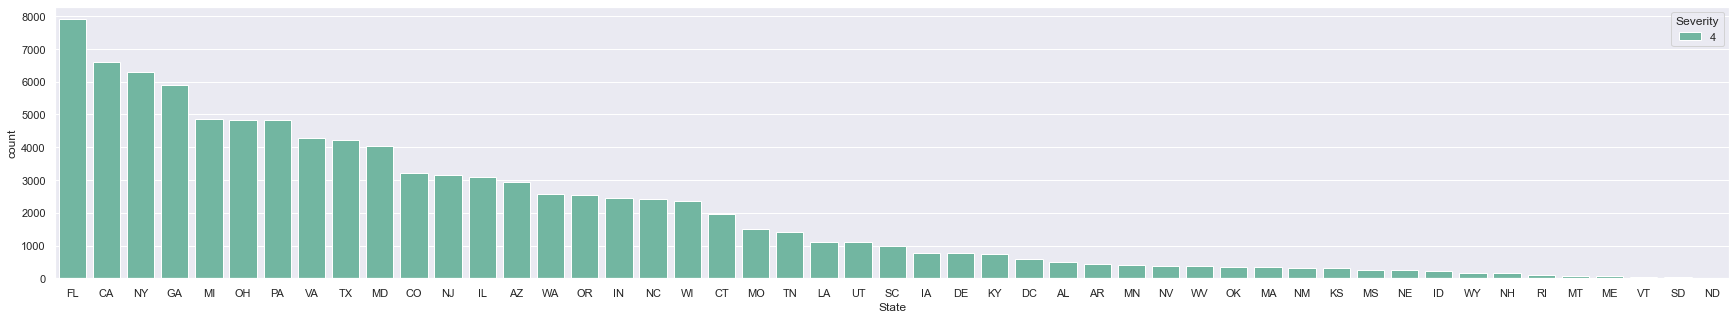

In [59]:
#To be able to observe properly we can subset our df by severity
severity4= df[(df['Severity']==4)]

sns.countplot(x='State', hue='Severity', 
                      data=severity4 ,palette="Set2", order=severity4['State'].value_counts().index)
sns.set(rc={'figure.figsize':(30,5)})

It is very interesting to see how some states such as california and florida seem to have higher accidents with high severity but also a lot of prevalence of other severities. While other states done show many of the low severity accidents but do have high severity such as GA, MI and OH

## Severity and Side

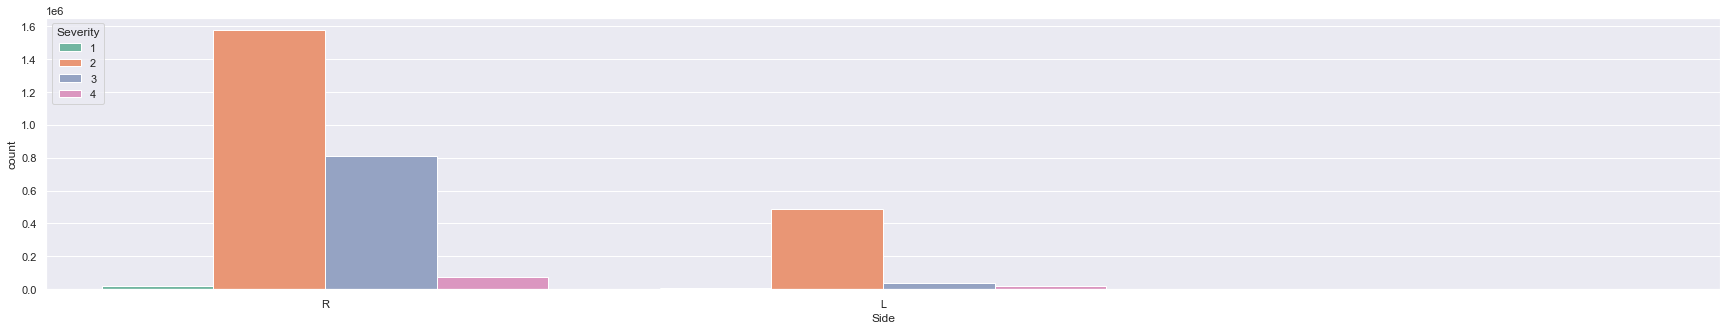

In [60]:
#Evaluation of side of road
sns.countplot(x='Side', hue='Severity', data=df ,palette="Set2")


Seems to exist a higher prevalence of accidents on the Right side 

### One-hot Encoding

In [22]:
# One-hot Encoding for true and false

df = df.replace([True, False], [1,0])

cat = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,County,...,Crossing_1,Give_Way_1,Junction_1,No_Exit_1,Railway_1,Roundabout_1,Station_1,Stop_1,Traffic_Calming_1,Traffic_Signal_1
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,...,0,0,0,0,0,0,0,0,0,1
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,...,0,0,0,0,0,0,0,0,0,0
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,0,0,0,0,0,0,0,0,0,1
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,Franklin,...,0,0,0,0,0,0,0,0,0,0
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,Montgomery,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# One-hot Encoding for day and night

df = df.replace(['Day', 'Night'], [1,0])

cat = ['Sunrise_Sunset']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df.head()

KeyError: "None of [Index(['Sunrise_Sunset'], dtype='object')] are in the [columns]"

In [27]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Sunrise_Sunset_1', 'Amenity_1', 'Bump_1',
       'Crossing_1', 'Give_Way_1', 'Junction_1', 'No_Exit_1', 'Railway_1',
       'Roundabout_1', 'Station_1', 'Stop_1', 'Traffic_Calming_1',
       'Traffic_Signal_1'],
      dtype='object')

In [28]:
dfsubset = df.drop(['ID', 'Start_Time', 'End_Time', 'Wind_Direction','Distance(mi)','Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode','Country','Weather_Condition'],axis=1)
dfsubset.head(2)

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset_1,Amenity_1,Bump_1,Crossing_1,Give_Way_1,Junction_1,No_Exit_1,Railway_1,Roundabout_1,Station_1,Stop_1,Traffic_Calming_1,Traffic_Signal_1
2,2,36.0,100.0,29.67,10.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,35.1,96.0,29.64,9.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model

## Severity 4
The aim is to create a model that can predict the severity of the accident. Since the highest severity is 4. I have decided to split the data to focus on the prediction of severity 4.

In [29]:
dfsubset['Severity4'] = 0
dfsubset.loc[df['Severity'] == 4, 'Severity4'] = 1
dfsubset.Severity4.value_counts()

0    2933624
1      94241
Name: Severity4, dtype: int64

### Train and Split

In [30]:
x_data=dfsubset.drop('Severity4',axis=1)
y_data = dfsubset['Severity4']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 908360
number of training samples: 2119505


### Logistic Regression

In [31]:
# Logistic regression with default setting.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR
yhat = LR.predict(x_test)
print(yhat)
accuracy_train = LR.score(x_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = LR.score(x_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

[0 0 0 ... 1 0 0]
Train Accuracy: 100.0%
Test Accuracy: 100.0%


Text(0.5, 1.0, 'Confusion Matrix (resampled data)\n-Default Logistic Regression')

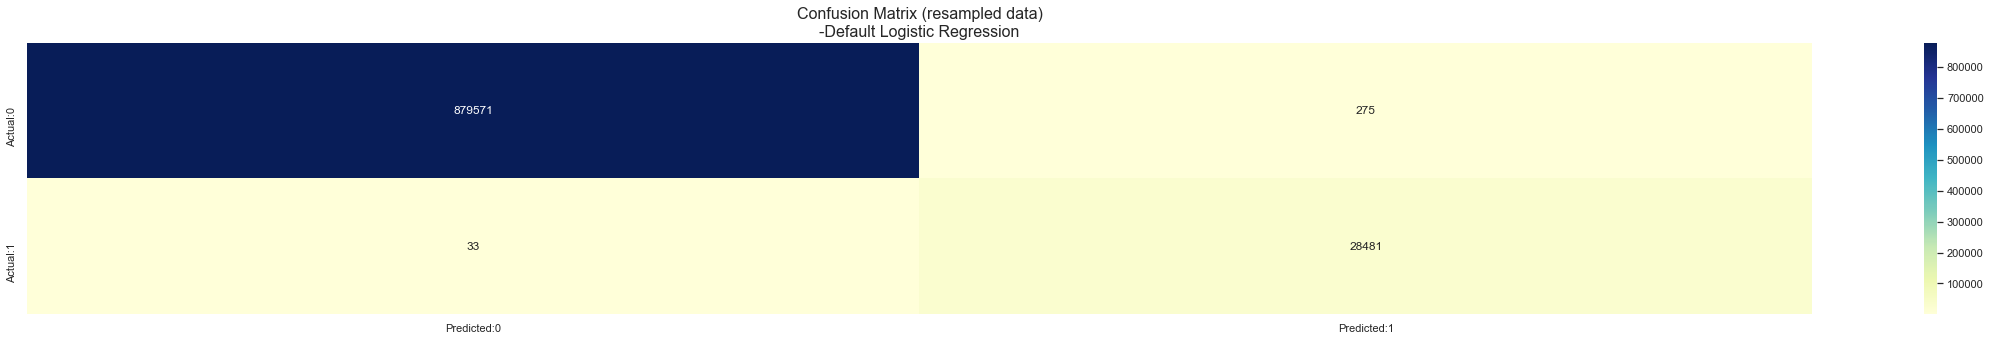

In [32]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = LR.predict(x_test)

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred,labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Confusion Matrix (resampled data)\n-Default Logistic Regression", fontsize=16)


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# Training step, on x_train with y_train
tree_clf = tree.DecisionTreeClassifier(min_samples_split = 5)
tree_clf = tree_clf.fit(x_train,y_train)

tree_accuracy_train = tree_clf.score(x_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = tree_clf.score(x_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

Train Accuracy: 100.0%
Test Accuracy: 100.0%


[Text(1116.0, 203.85000000000002, 'ID <= 3.5\ngini = 0.06\nsamples = 2119505\nvalue = [2053778, 65727]\nclass = y[0]'),
 Text(558.0, 67.94999999999999, 'gini = 0.0\nsamples = 2053778\nvalue = [2053778, 0]\nclass = y[0]'),
 Text(1674.0, 67.94999999999999, 'gini = 0.0\nsamples = 65727\nvalue = [0, 65727]\nclass = y[1]')]

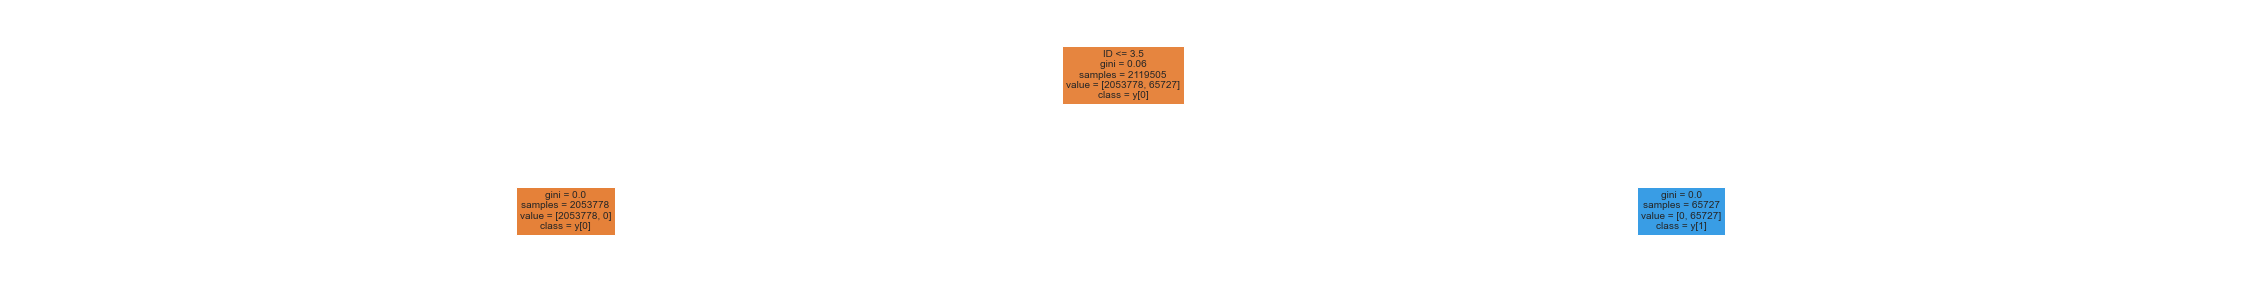

In [34]:
tree.plot_tree(tree_clf, max_depth=4, fontsize=10,
               feature_names=df.drop('Severity',axis =1).columns.to_list(),
               class_names = True, filled=True)


## All Severities
Prediction of all severities of accidents with the same models

In [35]:
#Train and Split
x_data=dfsubset.drop('Severity',axis=1)
y_data = dfsubset['Severity']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 908360
number of training samples: 2119505


In [36]:
# Logistic regression with default setting.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR
yhat = LR.predict(x_test)
print(yhat)
accuracy_train = LR.score(x_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = LR.score(x_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

[2 2 2 ... 4 2 2]
Train Accuracy: 71.1%
Test Accuracy: 71.1%


Train Accuracy: 90.0%
Test Accuracy: 67.0%


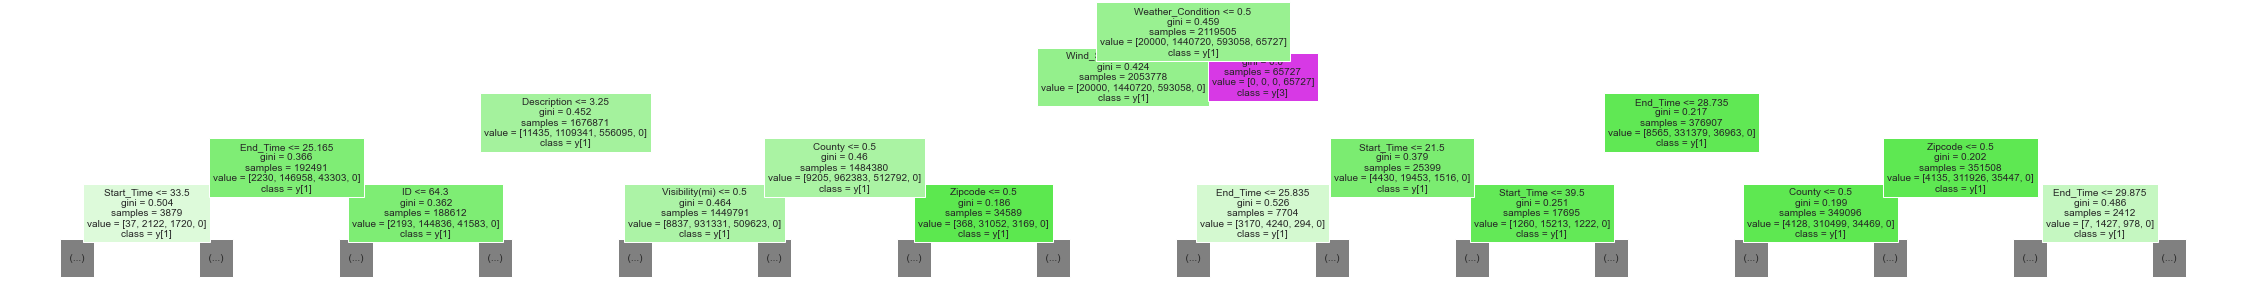

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Training step, on x_train with y_train
tree_clf = tree.DecisionTreeClassifier(min_samples_split = 5)
tree_clf = tree_clf.fit(x_train,y_train)

tree_accuracy_train = tree_clf.score(x_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = tree_clf.score(x_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

tree.plot_tree(tree_clf, max_depth=4, fontsize=10,
               feature_names=df.drop('Severity',axis =1).columns.to_list(),
               class_names = True, filled=True)
sns.set(rc={'figure.figsize':(40,20)})